In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pysta
import stc
%load_ext autoreload
%autoreload 2

In [ ]:
# clean up 
# pd.read_csv("data/0626_PSTH_CellType.csv")[["channel_name","cell_type"]].to_csv("data/0626_CellType.csv", index=None)


In [ ]:
cell_type = pd.read_csv("data/0626_CellType.csv")

In [ ]:
idx_on = cell_type["cell_type"]== "ON"
idx_off = cell_type["cell_type"]== "OFF"
idx_on_off = cell_type["cell_type"]== "ON/OFF"

print(np.sum(idx_on))
print(np.sum(idx_off))
print(np.sum(idx_on_off))

print(np.sum(idx_on) / len(cell_type))
print(np.sum(idx_off) / len(cell_type))
print(np.sum(idx_on_off) / len(cell_type))


In [ ]:
cell_type.loc[idx_on]["channel_name"].to_csv("data/0626_on.txt", header=False, index=None)
cell_type.loc[idx_off]["channel_name"].to_csv("data/0626_off.txt", header=False, index=None)
cell_type.loc[idx_on_off]["channel_name"].to_csv("data/0626_on_off.txt", header=False, index=None)

## 추가 정보 (Data_PSTH_CellType.xlsx)
																		
7	11	24			8	7	27			8	14	19			8	5	3
    

In [63]:
# 1st set 
#data = pd.read_excel("data/cell_type.xlsx", usecols="A:D")  # 20180618
#data = pd.read_excel("data/cell_type.xlsx", usecols="F:I")   # 20190621
data = pd.read_excel("data/cell_type.xlsx", usecols="P:S")   # 20180626
# data.head()

columns = list(data.columns)

dataset_name = columns[0]
print(dataset_name)

columns[0] = "channel_name"

# remove ".XXX"
for i, col in enumerate(columns):
    idx = col.find(".")
    #print(idx)
    
    if idx > 0:
        columns[i] = col[:idx]
        #print(col[:idx])

data.columns = columns

# remove empty row
idx = pd.isna(data["channel_name"])
idx
data.drop(data.index[idx], inplace=True)

data

20180828


,channel_name,ON,OFF,ON/OFF
0,12a,NaN,O,NaN
1,12c,O,NaN,NaN
2,12d,O,NaN,NaN
3,13a,NaN,NaN,O
4,14a,O,NaN,NaN
5,22a,O,NaN,NaN
6,22b,NaN,O,NaN
7,23c,O,NaN,NaN
8,23d,O,NaN,NaN
9,25c,NaN,O,NaN


In [64]:
idx_on = data["ON"] == "O"
idx_off = data["OFF"] == "O"
idx_on_off = data["ON/OFF"] == "O"


In [65]:
# generate "cell_type" column
data["cell_type"] = "unknown"

data.loc[idx_on,"cell_type"] = "ON"
data.loc[idx_off,"cell_type"] = "OFF"
data.loc[idx_on_off,"cell_type"] = "ON/OFF"

data.head()


,channel_name,ON,OFF,ON/OFF,cell_type
0,12a,NaN,O,NaN,OFF
1,12c,O,NaN,NaN,ON
2,12d,O,NaN,NaN,ON
3,13a,NaN,NaN,O,ON/OFF
4,14a,O,NaN,NaN,ON


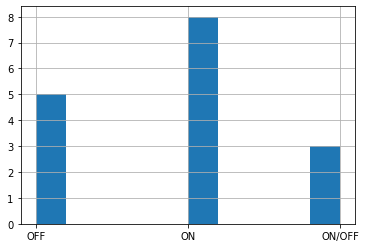

In [66]:
data["cell_type"].hist()

In [67]:
# save 
data.to_csv("data/{}_cell_type.csv".format(dataset_name), columns=["channel_name","cell_type"], index=None)